In [1]:
import nltk
import nltk.corpus
# The next line downloads all the example texts used in the NLTK book at https://www.nltk.org/book !
# You can comment out the download line after the first time you do it.
nltk.download('book')
from nltk.book import *
# The next line lets us do GET requests from remote URLs on the web:
from urllib import request
# The following import lines are for plotting interactive visualizations in Python
import matplotlib
import matplotlib.pyplot as plt
import tk

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\LEOHK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\LEOHK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\LEOHK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\LEOHK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\LEOHK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\LEOHK\AppData\Roaming\nltk_data...
[nltk_data]    |   U

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


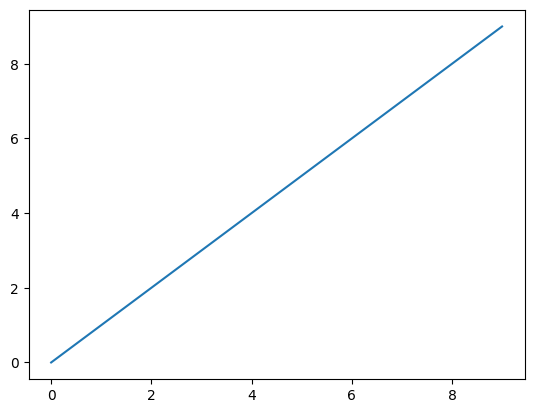

In [2]:
plt.plot(range(10))
plt.show()

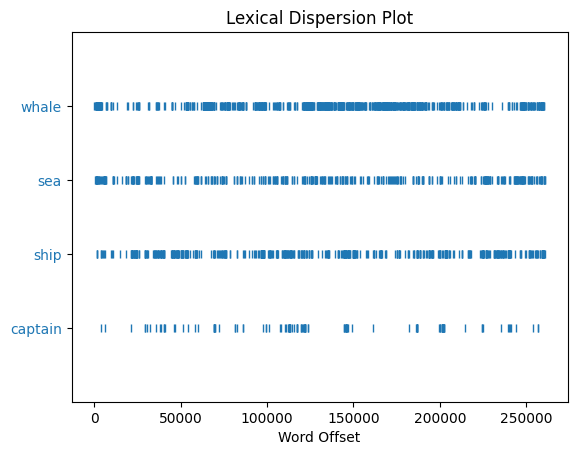

In [3]:
### See how these words are dispersed in NLTK text 1 (Moby Dick)
words = ["whale", "sea", "ship", "captain"]
nltk.draw.dispersion_plot(text1, words)
plt.show()

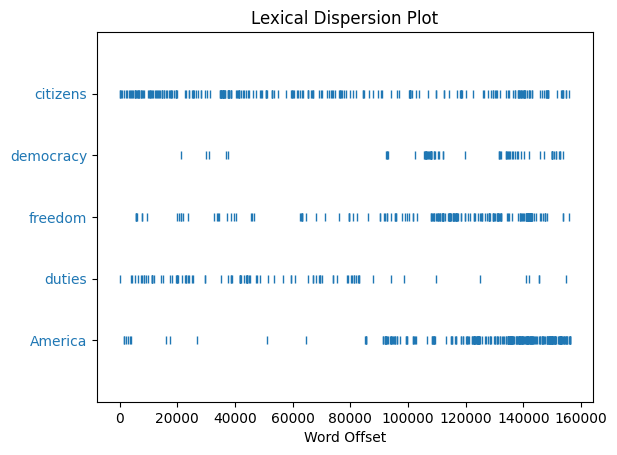

In [4]:
# Another dispersion plot written closer to the NLTK example:
# Choose the text first (text 4 is Inaugural Addresses):
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])
plt.show()

In [5]:
text6.common_contexts(["find","seek"])

to_the you_the


In [6]:
text6.similar('grail')

britons same rabbit lord system nose forest curtains questions scene
who saxons one land what coconuts two husk air cart


In [7]:
def lexical_diversity(text):
    return len(set(text)) / len(text) * 100 
    # ebb: I'm just  multipling by 100 to yield this as a percentage value

montyPython = lexical_diversity(text6)  
mobyDick = lexical_diversity(text3)

print(f"montyPython = {montyPython}")
print(f"mobyDick = {mobyDick}")

montyPython = 12.76595744680851
mobyDick = 6.230453042623537


In [10]:
# Blithedale Romance text file on Project Gutenberg
bookurl= "https://www.gutenberg.org/cache/epub/2081/pg2081.txt"
response = request.urlopen(bookurl)
br = response.read().decode('utf8')
type(br)
print(len(br))
# make a variable
howLong = len(br)
# picture string version! 
print(f"howLong = {howLong}")
novelSlice = br[:500]
print(f"novelSlice = {novelSlice}")

splitEmUp = br.split()
print(f"splitEmUp = {splitEmUp}")

for token in splitEmUp:
    if token.endswith('ing'):
        print(token)

464044
howLong = 464044
novelSlice = ﻿The Project Gutenberg eBook of The Blithedale Romance
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using t
splitEmUp = ['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Blithedale', 'Romance', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenber

In [11]:
concordance = nltk.Text(splitEmUp).concordance("living")
print(f"concordance = {concordance}")

Displaying 7 of 7 matches:
his lady-love,--in short, we were a living epitome of defunct fashions, and th
leafy shadow where he stood, like a living tip of fire. He carried a stick wit
tural and immediate. It is with the living voice alone that she can compel the
ne, and twenty other faces that are living now, shall be hung up; and as for m
ke a gray kennel-rat than any other living thing, he began to take the aspect 
l me how all things were. The first living creature that I met was a partridge
orcibly conscious of an intense and living pain there. Her glance, wandering w
concordance = None


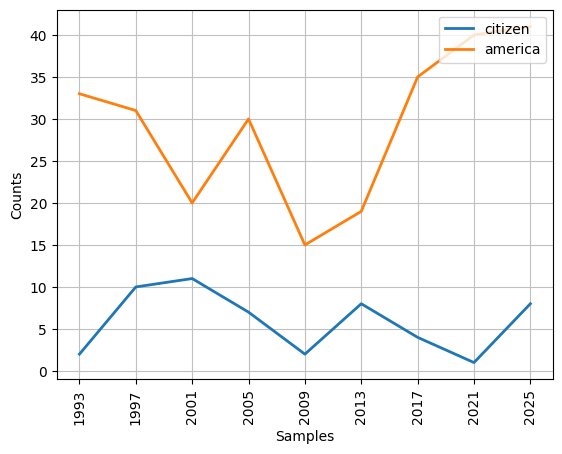

In [12]:
from nltk.corpus import inaugural
inaugural.fileids()
cfd = nltk.ConditionalFreqDist(
    (target,fileid[:4])
    for fileid in inaugural.fileids()
    # I added the next line to help make the plot more legible!
    if int(fileid[:4]) > 1990
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot()
plt.show()